# TODO

* Add derivations requested in class

not first one: https://youtu.be/2KXoC6Dxhxs?t=754

## Load and standardize the data

Download the prostate cancer dataset from the course website.

In this prostate cancer study **9 variables** (including *age, log weight, log cancer volume, etc.*) were measured for **97 patients**.

We will now construct a model to **predict the 9th variable**, a linear combination of the other 8.

A description of this dataset appears in the textbook of Hastie et al, freely available on the course website:

>"The data for this example come from a study by Stamey et al. (1989) that examined the correlation
between the level of prostate specific antigen (PSA) and a number of clinical measures, in 97 men who were
about to receive a radical prostatectomy.
>
>**The goal is to predict the log of PSA (lpsa)** from a number of measurements including log cancer volume (lcavol), log prostate weight lweight, age, log of benign prostatichyperplasia amount lbph, seminal vesicle invasion svi, log of capsular penetration lcp, Gleason score gleason, and percent of Gleason scores 4 or 5 pgg45."

 "***The Elements of Statistical Learning.*** *Data Mining, Inference, and Prediction*"
 
Trevor Hastie, Robert Tibshirani, Jerome Friedman

https://web.stanford.edu/~hastie/ElemStatLearn//printings/ESLII_print12.pdf

In [34]:
import numpy as np

In [35]:
# 1. First load the data and split it into a response vector (y) and a matrix of attributes (X),
X = np.loadtxt('prostate.data.txt', skiprows=1, delimiter='\t')
y = X[:, -1]
X = X[:,0: -1]
print('Patients: {}'.format(len(y)))
print('  lcavol\tlweight\t  age\t\tlbph\t\tsvi\tlcp\tgleason\tpgg45\tlpsa')
print(X[0, :])
print(y[0])

Patients: 97
  lcavol	lweight	  age		lbph		svi	lcp	gleason	pgg45	lpsa
[-0.5798185   2.769459   50.         -1.38629436  0.         -1.38629436
  6.          0.        ]
-0.4307829


In [36]:
#Choose the first 50 patients as the training data. The remaining patients will be the test data.
y_train, y_test = y[0:50], y[50:]
X_train, X_test = X[0:50], X[50:]

print('Training set: {} elements'.format(len(y_train)))
print('Test set: {} elements'.format(len(y_test)))

Training set: 50 elements
Test set: 47 elements


In [37]:
# Set both variables to have zero mean and standardize the input variables to have unit variance.
# Get mean and std
X_bar = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
y_bar = np.mean(y_train)

# Before normalization
print('Before normalization')
print(X_train[0:3])
print(y_train[0:3], '\n')
# Normalize
y_train = y_train - y_bar
X_train = (X_train - X_bar) / X_std

#After normalization
print('After normalization')
print(X_train[0:3])
print(y_train[0:3])

Before normalization
[[-0.5798185   2.769459   50.         -1.38629436  0.         -1.38629436
   6.          0.        ]
 [-0.99425227  3.319626   58.         -1.38629436  0.         -1.38629436
   6.          0.        ]
 [-0.51082562  2.691243   74.         -1.38629436  0.         -1.38629436
   7.         20.        ]]
[-0.4307829 -0.1625189 -0.1625189] 

After normalization
[[-1.26972558 -1.84388102 -1.72937235 -0.92242702 -0.20412415 -0.62841263
  -0.7428692  -0.56945562]
 [-1.67344433 -0.34399259 -0.64000394 -0.92242702 -0.20412415 -0.62841263
  -0.7428692  -0.56945562]
 [-1.2025165  -2.05711677  1.53873288 -0.92242702 -0.20412415 -0.62841263
   0.63281451  0.26065461]]
[-2.05581329 -1.78754929 -1.78754929]


## Important detail:

In the training step, we will learn the bias $\theta_0$ **separately**.

We do this because it makes **no sense** to apply regularization to the **bias** $\theta_0$.

Recall that the purpose of regularization is to **get rid of unwanted input attributes**.

We will need the terms (X_bar, X_std, y_bar) when we do predictions.

Mathematically, what we are saying is that the bias term will be computed separately as follows:

$$\theta_0 = \bar{y} - \bar{x}^T\hat\theta_j $$

where $\bar{y}$ is the mean of the elements of the training data vector $y$ and $\bar{x}^T$ is the vector of 8 means for the input attributes.

Note that in this case the 8-dimensional parameter vector $\hat\theta$ includes all the parameters other than the bias term that have been **learned with ridge regression**.

That is, we first learn $\hat\theta$ using standardized data and then proceed to learn $\theta_0$ (bias).

When we encounter a **new** input $x^*$ in the **test set**, we need **to standardize** it before making a prediction.

The actual prediction should be:

$$\hat{y} = \bar{y} + \sum_{j=1}^8 \frac{x_j^* - \bar{x}_j}{\sigma_j} \hat\theta_j$$

Figure 1: Regularization path for ridge regression.

where $\hat{x}_j$ and $\sigma_j$ are the **mean* and **standard deviation** of the $j$-th attribute obtained from the **training data**.

One reason for standardizing the inputs is that we want them to be **comparable**.

If we had an input much bigger than the other, we would have wanted to apply a different regularizer to it.

By standardizing the inputs first, we only need **a single scalar regularization** coefficient $\delta^2$.

> **Figure 1:** Regularization path for ridge regression.
>
> ![ridge-regression.png](./img/ridge-regression.png)



## Ridge regression (*Tikhonov regularization*)

$$\hat\theta = (X^TX + \delta^2I \,)^{-1} (y^TX)$$

We will now construct a model using [ridge regression](https://en.wikipedia.org/wiki/Tikhonov_regularization) to predict the 9th variable as a **linear combination** of the other 8.
1. Write code for ridge regression starting from the following skeleton:

>    def ridge(X, y, d2):
>
>        # ???
>        return theta

In [56]:
def ridge(X, y, d2):
    # Identity matrix of size 8
    num_feat = np.shape(X)[1]
    I = np.eye(num_feat)
    # shape(X) : (97, 8)
    Xt = np.transpose(X)
    yt = np.transpose(y)
    XtX = np.dot(Xt, X) 
    ytX = np.dot(yt, X)
    theta = np.dot(np.linalg.inv(XtX + d2*I), ytX)
    return theta

Compute the ridge regression **solutions** for a range of regularizers ($\delta^2$).

Plot the **values of each $\theta$ in the y-axis** against $\delta^2$ in the x-axis.

This set of plotted values is known as a ***regularization path***.

Your plot should look like **Figure 1**.

Hand in your version of this plot, along with the code you used to generate
it.

In [57]:
def get_thetas(X_train, y_train):
    thetas = []
    d2s = []
    for i in np.arange(-3, 9, 0.25):
        d2 = 10**i
        d2s.append(d2)
        thetas.append(ridge(X_train, y_train, d2))
    return d2s, thetas

d2s, thetas = get_thetas(X_train, y_train)
print('thetas shape:', np.shape(thetas))

thetas shape: (48, 8)


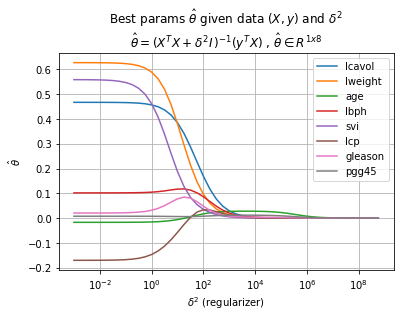

In [58]:
import matplotlib.pyplot as plt

labels=['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45']

plt.plot(d2s, thetas)
plt.xscale('log')
plt.title('\n'.join((r'Best params $\hat\theta$ given data ($X,y$) and $\delta^2$',
                   r'$\hat\theta = (X^TX + \delta^2I \,)^{-1} (y^TX)$ , $\hat\theta \in R^{1x8}$')))
plt.xlabel(r'$\delta^2$ (regularizer)')
plt.ylabel(r'$\hat\theta$')
plt.grid()
plt.legend(labels)
plt.show()

For **each computed value of $\hat\theta$**, compute the **train and test error**.

Remember, you will **have to standardize your test data** with the same means and standard deviations as above (X_bar, X_std, y_bar) **before you can make a prediction** and compute your test error.

In other words, to make a prediction do:

> $$\hat y = \bar y + \frac{X_{test} - \bar X}{\sigma_X} \hat\theta$$
>
>    y_hat = y_bar + numpy.dot((X_test - Xbar) / X_std, theta)
    
Choose a value of $\delta^2$ **using cross-validation**. 

What is this value? Show all your intermediate cross-validation steps and the criterion you used to choose $\delta^2$.

Plot the train and test errors as a function of $\delta^2$ .


In [59]:
train_errors = np.zeros(len(d2s))
test_errors  = np.zeros(len(d2s))
cv_folds = 5
for f in range(cv_folds):
    # 5-fold cross validation
    #  + 19 for test
    #  + 79 for training
    data_size = len(y)
    test_size = data_size // cv_folds #19
    # | 1 | 2 | 3 | 4 | 5 |
    start_test = 0+f*test_size
    end_test = start_test + test_size
    start_1_train = 0
    end_1_train   = max(0, start_test)
    start_2_train = min(end_test, data_size)
    end_2_train   = -1
    # Separate data
    y_test = y[start_test:end_test]
    X_test = X[start_test:end_test]
    y_train = np.concatenate((y[start_1_train:end_1_train], y[start_2_train:end_2_train]))
    X_train = np.concatenate((X[start_1_train:end_1_train], X[start_2_train:end_2_train]))
    # Get thetas for training data
    d2s, thetas = get_thetas(X_train, y_train)
    # Calculate mean and std
    X_bar = np.mean(X_train, axis=0)
    X_std = np.std(X_train, axis=0)
    y_bar = np.mean(y_train)
    standar_X_test = (X_test - X_bar) / X_std
    for i, theta in enumerate(thetas):
        # Training error (accumulates over k-folds)
        y_hat_train = np.dot(X_train, theta)
        error = np.linalg.norm((y_train - y_hat_train), ord=2)/np.linalg.norm(y_train, ord=2)
        train_errors[i] += error
        # Test error (accumulates over k-folds)
        y_hat_test  = y_bar + np.dot(standar_X_test, theta)
        error = np.linalg.norm((y_test - y_hat_test), ord=2)/np.linalg.norm(y_test, ord=2)
        test_errors[i] += error

# Take mean of k-folds errors
train_errors = train_errors / cv_folds
test_errors = test_errors / cv_folds

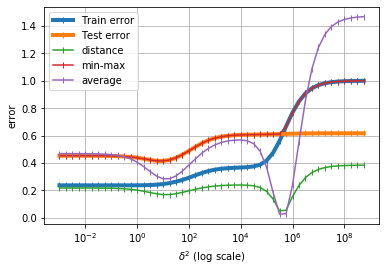

In [60]:
plt.plot(d2s, train_errors, label='Train error', marker='|', linewidth=4)
plt.plot(d2s, test_errors, label='Test error', marker='|', linewidth=4)
plt.plot(d2s, abs(test_errors-train_errors), label='distance', marker='|')
plt.plot(d2s, np.maximum(test_errors,train_errors), label='min-max', marker='|')
plt.plot(d2s, 10*np.square(test_errors-train_errors), label='average', marker='|')
plt.xscale('log')
plt.xlabel(r'$\delta^2$ (log scale)')
plt.ylabel('error')
plt.grid()
plt.legend()
plt.show()
#print(d2s)

Using this information I can focus my search between 1 and 100

In [61]:
def get_finer_thetas(X_train, y_train):
    thetas = []
    d2s = []
    for i in np.arange(1, 100, 0.25):
        d2 = i
        d2s.append(d2)
        thetas.append(ridge(X_train, y_train, d2))
    return d2s, thetas

d2s, thetas = get_finer_thetas(X_train, y_train)
print('thetas shape:', np.shape(thetas))

thetas shape: (396, 8)


In [62]:
train_errors = np.zeros(len(d2s))
test_errors  = np.zeros(len(d2s))
cv_folds = 5
for f in range(cv_folds):
    # 5-fold cross validation
    #  + 19 for test
    #  + 79 for training
    data_size = len(y)
    test_size = data_size // cv_folds #19
    # | 1 | 2 | 3 | 4 | 5 |
    start_test = 0+f*test_size
    end_test = start_test + test_size
    start_1_train = 0
    end_1_train   = max(0, start_test)
    start_2_train = min(end_test, data_size)
    end_2_train   = -1
    # Separate data
    y_test = y[start_test:end_test]
    X_test = X[start_test:end_test]
    y_train = np.concatenate((y[start_1_train:end_1_train], y[start_2_train:end_2_train]))
    X_train = np.concatenate((X[start_1_train:end_1_train], X[start_2_train:end_2_train]))
    # Get thetas for training data
    d2s, thetas = get_finer_thetas(X_train, y_train)
    # Calculate mean and std
    X_bar = np.mean(X_train, axis=0)
    X_std = np.std(X_train, axis=0)
    y_bar = np.mean(y_train)
    standar_X_test = (X_test - X_bar) / X_std
    for i, theta in enumerate(thetas):
        # Training error (accumulates over k-folds)
        y_hat_train = np.dot(X_train, theta)
        error = np.linalg.norm((y_train - y_hat_train), ord=2)/np.linalg.norm(y_train, ord=2)
        train_errors[i] += error
        # Test error (accumulates over k-folds)
        y_hat_test  = y_bar + np.dot(standar_X_test, theta)
        error = np.linalg.norm((y_test - y_hat_test), ord=2)/np.linalg.norm(y_test, ord=2)
        test_errors[i] += error

# Take mean of k-folds errors
train_errors = train_errors / cv_folds
test_errors = test_errors / cv_folds

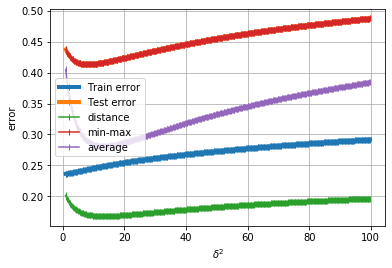

In [65]:
plt.plot(d2s, train_errors, label='Train error', marker='|', linewidth=4)
plt.plot(d2s, test_errors, label='Test error', marker='|', linewidth=4)
plt.plot(d2s, abs(test_errors-train_errors), label='distance', marker='|')
plt.plot(d2s, np.maximum(test_errors,train_errors), label='min-max', marker='|')
plt.plot(d2s, 10*np.square(test_errors-train_errors), label='average', marker='|')
#plt.xscale('log')
plt.xlabel(r'$\delta^2$')
plt.ylabel('error')
plt.grid()
plt.legend()
plt.show()
#print(d2s)

In [61]:
def get_finer_thetas(X_train, y_train):
    thetas = []
    d2s = []
    for i in np.arange(1, 100, 0.25):
        d2 = i
        d2s.append(d2)
        thetas.append(ridge(X_train, y_train, d2))
    return d2s, thetas

d2s, thetas = get_finer_thetas(X_train, y_train)
print('thetas shape:', np.shape(thetas))

thetas shape: (396, 8)


In [62]:
train_errors = np.zeros(len(d2s))
test_errors  = np.zeros(len(d2s))
cv_folds = 5
for f in range(cv_folds):
    # 5-fold cross validation
    #  + 19 for test
    #  + 79 for training
    data_size = len(y)
    test_size = data_size // cv_folds #19
    # | 1 | 2 | 3 | 4 | 5 |
    start_test = 0+f*test_size
    end_test = start_test + test_size
    start_1_train = 0
    end_1_train   = max(0, start_test)
    start_2_train = min(end_test, data_size)
    end_2_train   = -1
    # Separate data
    y_test = y[start_test:end_test]
    X_test = X[start_test:end_test]
    y_train = np.concatenate((y[start_1_train:end_1_train], y[start_2_train:end_2_train]))
    X_train = np.concatenate((X[start_1_train:end_1_train], X[start_2_train:end_2_train]))
    # Get thetas for training data
    d2s, thetas = get_finer_thetas(X_train, y_train)
    # Calculate mean and std
    X_bar = np.mean(X_train, axis=0)
    X_std = np.std(X_train, axis=0)
    y_bar = np.mean(y_train)
    standar_X_test = (X_test - X_bar) / X_std
    for i, theta in enumerate(thetas):
        # Training error (accumulates over k-folds)
        y_hat_train = np.dot(X_train, theta)
        error = np.linalg.norm((y_train - y_hat_train), ord=2)/np.linalg.norm(y_train, ord=2)
        train_errors[i] += error
        # Test error (accumulates over k-folds)
        y_hat_test  = y_bar + np.dot(standar_X_test, theta)
        error = np.linalg.norm((y_test - y_hat_test), ord=2)/np.linalg.norm(y_test, ord=2)
        test_errors[i] += error

# Take mean of k-folds errors
train_errors = train_errors / cv_folds
test_errors = test_errors / cv_folds

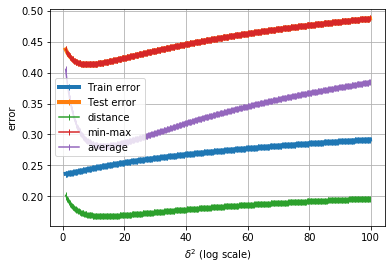

In [64]:
plt.plot(d2s, train_errors, label='Train error', marker='|', linewidth=4)
plt.plot(d2s, test_errors, label='Test error', marker='|', linewidth=4)
plt.plot(d2s, abs(test_errors-train_errors), label='distance', marker='|')
plt.plot(d2s, np.maximum(test_errors,train_errors), label='min-max', marker='|')
plt.plot(d2s, 10*np.square(test_errors-train_errors), label='average', marker='|')
#plt.xscale('log')
plt.xlabel(r'$\delta^2$ (log scale)')
plt.ylabel('error')
plt.grid()
plt.legend()
plt.show()
#print(d2s)

In [66]:
def get_finer_thetas(X_train, y_train):
    thetas = []
    d2s = []
    for i in np.arange(1, 20, 0.25):
        d2 = i
        d2s.append(d2)
        thetas.append(ridge(X_train, y_train, d2))
    return d2s, thetas

d2s, thetas = get_finer_thetas(X_train, y_train)
print('thetas shape:', np.shape(thetas))

thetas shape: (76, 8)


In [67]:
train_errors = np.zeros(len(d2s))
test_errors  = np.zeros(len(d2s))
cv_folds = 5
for f in range(cv_folds):
    # 5-fold cross validation
    #  + 19 for test
    #  + 79 for training
    data_size = len(y)
    test_size = data_size // cv_folds #19
    # | 1 | 2 | 3 | 4 | 5 |
    start_test = 0+f*test_size
    end_test = start_test + test_size
    start_1_train = 0
    end_1_train   = max(0, start_test)
    start_2_train = min(end_test, data_size)
    end_2_train   = -1
    # Separate data
    y_test = y[start_test:end_test]
    X_test = X[start_test:end_test]
    y_train = np.concatenate((y[start_1_train:end_1_train], y[start_2_train:end_2_train]))
    X_train = np.concatenate((X[start_1_train:end_1_train], X[start_2_train:end_2_train]))
    # Get thetas for training data
    d2s, thetas = get_finer_thetas(X_train, y_train)
    # Calculate mean and std
    X_bar = np.mean(X_train, axis=0)
    X_std = np.std(X_train, axis=0)
    y_bar = np.mean(y_train)
    standar_X_test = (X_test - X_bar) / X_std
    for i, theta in enumerate(thetas):
        # Training error (accumulates over k-folds)
        y_hat_train = np.dot(X_train, theta)
        error = np.linalg.norm((y_train - y_hat_train), ord=2)/np.linalg.norm(y_train, ord=2)
        train_errors[i] += error
        # Test error (accumulates over k-folds)
        y_hat_test  = y_bar + np.dot(standar_X_test, theta)
        error = np.linalg.norm((y_test - y_hat_test), ord=2)/np.linalg.norm(y_test, ord=2)
        test_errors[i] += error

# Take mean of k-folds errors
train_errors = train_errors / cv_folds
test_errors = test_errors / cv_folds

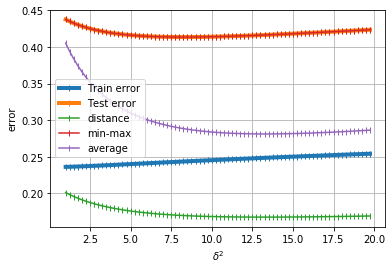

In [69]:
plt.plot(d2s, train_errors, label='Train error', marker='|', linewidth=4)
plt.plot(d2s, test_errors, label='Test error', marker='|', linewidth=4)
plt.plot(d2s, abs(test_errors-train_errors), label='distance', marker='|')
plt.plot(d2s, np.maximum(test_errors,train_errors), label='min-max', marker='|')
plt.plot(d2s, 10*np.square(test_errors-train_errors), label='average', marker='|')
#plt.xscale('log')
plt.xlabel(r'$\delta^2$')
plt.ylabel('error')
plt.grid()
plt.legend()
plt.show()
#print(d2s)

In [70]:
best_d2_idx = np.argmin((test_errors+train_errors)/2.)
best_d2 = d2s[best_d2_idx]
print('d^2 chosen by best average error:')
print('best d^2 = {:.2f} ~ {}\n'.format(best_d2, best_d2))

best_d2_idx = np.argmin(np.maximum(test_errors,train_errors))
best_d2 = d2s[best_d2_idx]
print('d^2 chosen by min-max error:')
print('best d^2 = {:.2f} ~ {}\n'.format(best_d2, best_d2))

best_d2_idx = np.argmin(abs(test_errors-train_errors))
best_d2 = d2s[best_d2_idx]
print('d^2 chosen by min difference:')
print('best d^2 = {:.2f} ~ {}'.format(best_d2, best_d2))

d^2 chosen by best average error:
best d^2 = 6.00 ~ 6.0

d^2 chosen by min-max error:
best d^2 = 8.25 ~ 8.25

d^2 chosen by min difference:
best d^2 = 13.25 ~ 13.25


**Answer:** Best $\delta^2 = 15$

$$\hat\theta_{best} = (X^TX + 15\,I \,)^{-1} (y^TX)$$

# Bayesian Linear Regression

Let $X \in R\,^{n \,\times\, d}$  and $y \in R\,^{n \,\times\, 1}$.

Assume the likelihood is Gaussian:

$$p(y | X, \theta, \Sigma) = |2\pi\Sigma|^{-\frac{1}{2}} e^{-\frac{1}{2} (y-X\theta)^T\Sigma^{-1}(y-X\theta)}$$

Assume that the prior for $\theta$ is also Gaussian:

$$p(\theta) = |2\pi\Delta|^{-\frac{1}{2}} e^{-\frac{1}{2} \theta^T\Delta^{-1}\theta}$$

1. Using Bayes rule and completing squares, derive an expression for the posterior distribution of θ.
 
   In this part, assume that the covariance $\Sigma$ **is given**.
 
   State clearly what the mean and variance of the posterior are.
 
   Also, state the conditions under which the posterior mean would be equivalent to the ridge and maximum likelihood estimators.
 
 


![](./img/bayes-37.45.png)

* **Problem:** That sum. Usually combinatorial or integral in high dimension (n=1millon, 1 millon dimensional integral)
* **Gaussian** has no problem being integrated. A $10^{12}$ dimensional integral can be solved without problem. 

## Bayesian learning for model parameters

> *If you have a **Gaussian Prior** $p(\theta)$,*
>
> *and you multiply it **times** a **Gaussian Likelihood** $p( D \,|\, \theta \,)$,*
>
> *and you **normalize** by $p(D)$,*
>
> *you get a **Gaussian Posterior** $p(\theta | D)$.*

Where:

> The **mean of the Posterior** $\equiv$ **Ridge Regression** (*Tikhonov regularization*)
>
> Our ***beliefs*** over the **parameters** are ***subjective***: $\theta$ is a random variable, there is no "$\text{true-theta}$".

### In a nutshell: we are going to *manipulate Gaussians*

**Step 1:** Given n data, $D = x_{1:n} = {x_1, x_2, ..., x_n}$, $x \in R^d$, write down the expression for the ***likelihood***:

> $$p( D \,|\, \theta \,) \sim \mathcal{N}(\theta | A\theta + b, \Sigma_y)$$

**Step 2:** Specify a ***prior***:
> $$p(\theta)\sim \mathcal{N}(\theta | \mu_\theta, \Sigma_\theta)$$

**Step 3:** Compute the ***posterior***:

> $$p(\theta | D) = \frac{p(D|\theta\,)p(\theta)}{p(D\,)} \, \propto \, p(D|\theta\,)p(\theta) \sim \mathcal{N}(\theta | \mu_{\theta|D}, \Sigma_{\theta|D})$$

Notice that proportional symbol "$\propto$".

Normalization term:
> $$p(D) = \int p(D|\theta) \, p(\theta) \, d\theta = \int p(D, \theta) \, d\theta$$


$p(D)$ is a **constant** wrt $\theta$, so:

> $$p(\theta | D) = \frac{1}{p(D\,)} p(D|\theta\,)p(\theta) \text{ : has the same distribution as: }\Rightarrow p(D|\theta\,)p(\theta)$$

2. Derive an analytical, closed-form expression for the **maximum likelihood estimate** of $\Sigma$.
  
  You will need the following **properties of matrix derivatives** (for a symmetric matrix A):

$$\frac{\partial log|A|}{\partial A} = A^{-1}$$

$$\frac{\partial trace(X^T AX)}{\partial A} = XX^T$$

**Hint:** Take derivatives of the log-likelihood with respect to $\Sigma^{-1}$.

* **Note:**

  $|A|$ is the determinant of matrix $A$, which is the [product of eigenvalues](https://www.cs.ox.ac.uk/people/nando.defreitas/machinelearning/class1.pdf). 

### Optimization way: ML

First, Maximum Likelihood for $\sigma$ in 1-d case (then $\Sigma$ in $R^{dxd}$):

Vector $y$ distributed as:

$$y \sim N(\mu, \sigma)$$

$$p(y|X,\theta,\sigma) = (2\pi\sigma^2)^{-n/2} e^{-\frac{1}{2\sigma^2} (y-X\theta)^T (y - X\theta)}$$

We want to maximize that conditional probability $p(y|X,\theta,\sigma)$

So we need to take the derivative, but first apply $log$ to both sides:

>$$l(\sigma) = -\frac{n}{2} log(2\pi\sigma^2) - \frac{1}{2\sigma^2} (y - X\theta)^T(y-X\theta)$$
>
>$$l(\sigma) = -\frac{n}{2} log(2\pi) -\frac{n}{2} log(\sigma^2) - \frac{1}{2\sigma^2} (y - X\theta)^T(y-X\theta)$$


Now, differentiate wrt $\sigma$

>$$l'(\sigma) = 0 -\frac{n}{2} \frac{2\sigma}{\sigma^2} + \frac{1}{2} 2\sigma (y-X\theta)^T(y-X\theta)$$
>
>$$l'(\sigma) = -\frac{n}{\sigma} + \sigma (y-X\theta)^T(y-X\theta)$$

We equate to zero to get critical point (which is a max because $l(\sigma)$ has a negative quadratic term)

>$$0 = -\frac{n}{\sigma} + \sigma (y-X\theta)^T(y-X\theta)$$
>
>
>$$\frac{n}{\sigma} = \sigma (y-X\theta)^T(y-X\theta)$$
>
>
>$$n = \sigma^2 (y-X\theta)^T(y-X\theta)$$
>
>
>$$n = \sigma^2 \sum_{i=1}^n (y_i-x_i\theta)^2$$
>
>
>$$\frac{n}{\sum_{i=1}^n (y_i-x_i\theta)^2} = \sigma^2$$
>
>
>$$\sqrt{\left(\frac{n}{\sum_{i=1}^n (y_i-x_i\theta)^2}\right)} = \sigma$$

Now for $\Sigma$ (covariance matrix):

>$$Y \sim N(\mu, \Sigma)$$
>
>$$p(Y|X,\theta,\Sigma) = (2\pi\Sigma^2)^{-n/2} e^{-\frac{1}{2\Sigma^2} (Y-X\theta)^T (Y - X\theta)}$$

Take log, and then differentiate as before (wrt ***matrix*** $\Sigma^{-1}$)

> $$l(\Sigma) = -\frac{n}{2} log(2\pi\Sigma^2) -\frac{1}{2\Sigma^2} (Y-X\theta)^T(Y-X\theta)$$ 

> $$l(\Sigma) = -\frac{n}{2} log(2\pi) -\frac{n}{2} log(\Sigma^2) -\frac{1}{2\Sigma^2} (Y-X\theta)^T(Y-X\theta)$$ 

>$$l'(\Sigma^{-1}) = -\frac{n}{2}\left[\frac{\partial}{\partial\Sigma^{-1}}log(\Sigma^2)\right] - \left[\frac{\partial}{\partial\Sigma^{-1}}  \Sigma^{-2} \right] \frac{1}{2} (Y-X\theta)^T(Y-X\theta)$$

>$$l'(\Sigma^{-1}) = -\frac{n}{2}\left[\frac{\partial}{\partial\Sigma^{-1}}log(\Sigma^2)\right] - \left[\frac{\partial}{\partial\Sigma^{-1}}  \Sigma^{-2} \right] \frac{1}{2} (Y-X\theta)^T(Y-X\theta)$$

I need those two derivatives:
    
> **1.** $\frac{\partial}{\partial\Sigma^{-1}}log(\Sigma^2) = \frac{\partial}{\partial\Sigma^{-1}}log((\Sigma^{-1})^{-2}) = $
>
>$= -2 \frac{\partial}{\partial\Sigma^{-1}} log((\Sigma^{-1}))$
>
>
> **2.** $\frac{\partial}{\partial\Sigma^{-1}}  \Sigma^{-2} = \frac{\partial}{\partial\Sigma^{-1}}  (\Sigma^{-1})^{2} $
>
> $= 2 \frac{\partial}{\partial\Sigma^{-1}}  (\Sigma^{-1}) = 2$

For **1.**, we can use this given property:

> For a symmetric matrix $A$:
> 
> $\frac{\partial log|A|}{\partial A} = A^{-1}$

Using [Cholesky decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition)

$\Sigma^2 = L L^T$

$\frac{\partial}{\partial\Sigma}log(\Sigma^2)$

$\frac{\partial}{\partial\Sigma}log(L L^T)$

Debo llegar a:

$\sigma^2 = (Y-X\theta)^T (Y-X\theta) = \frac{1}{n} \sum_{i=1}^n (y_i - x_i\theta)^2$

![bayes56.00.png](./img/bayes56.00.png)

Using Bayes rule for Gaussians, the posterior is given by:
    
> $$p(\theta \,|\, X,y,\sigma^2) \propto \mathcal{N}(\theta \,|\, \theta_0, V_0) \  \mathcal{N}(y\,|\,X\theta, \sigma^2 I) = \mathcal{N}(\theta \,|\, \theta_n, V_n)$$

Where:

> $$\theta_n = V_nV_0^{-1} -\frac{1}{\sigma^2}V_n X^T y$$
> 
> $$V_n^{-1} = V_0^{-1} -\frac{1}{\sigma^2}X^TX$$

* $V \in \mathbf{R}^{nxn}$ has orthonormal columns and rows, that is, $V$ is an **orthogonal matrix**, so $V^{-1} = V^T$

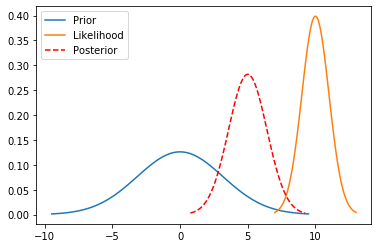

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

# Prior
mu = 0
variance = 10
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='Prior')

# Likelihood
mu = 10
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='Likelihood')

# Posterior (unknown)
mu = 5
variance = 2
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linestyle='dashed', label='Posterior')
plt.legend()
plt.show()

#### Derivation:

$$\large{p(\theta \,|\, y,X,\sigma^2) \, \propto \, p(y \,|\, X, \theta, \sigma^2) \, p(\theta) }$$

>$p(y \,|\, X, \theta, \sigma^2) = e^{\frac{-1}{2\sigma^2} (y-X\theta)^T(y-X\theta)} = e^{\frac{-1}{2} (y-X\theta)^T (\sigma^2 I)^{-1} (y-X\theta)}$
>
>$p(\theta) = e^{\frac{-1}{2} (\theta - \theta_0)^T V_0^{-1} (\theta-\theta_0)}$

$$p(\theta \,|\, y,X,\sigma^2) \propto \Large{ e^{\frac{-1}{2\sigma^2} (y-X\theta)^T(y-X\theta)} e^{\frac{-1}{2} (\theta - \theta_0)^T V_0^{-1} (\theta-\theta_0)}}$$

$$\Large{= e^{\frac{-1}{2} \left[ (y-X\theta)^T \sigma^{-2} (y-X\theta) \,+\, (\theta - \theta_0)^T V_0^{-1} (\theta-\theta_0) \right] }}$$

> $(y-X\theta)^T \sigma^{-2} (y-X\theta) = \sigma^{-2} y^T y \ -\  2\sigma^{-2} y X\theta \ +\  \sigma^{-2} \theta^T X^T X \theta$
>
> $(\theta - \theta_0)^T V_0^{-1} (\theta-\theta_0) = \theta^T V_0^{-1} \theta \ - \ 2 \theta_0^T V_0^{-1} \theta \ + \ \theta_0^T V_0^{-1} \theta_0$

$$\Large{= e^{\frac{-1}{2} \left[ \sigma^{-2} y^T y \ -\  2\sigma^{-2} y^T X\theta \ +\  \sigma^{-2} \theta^T X^T X \theta \ +\ \theta^T V_0^{-1} \theta \ - \ 2 \theta_0^T V_0^{-1} \theta \ + \ \theta_0^T V_0^{-1} \theta_0 \right] }}$$

Now I'll **group exponent terms** into ***quadratic*** ($\theta^T\theta$), ***linear*** ($\theta$) and ***constant*** (do not confuse with $\theta_0$!)

> $\sigma^{-2} y^T y \ -\  2\sigma^{-2} y^T X\theta \ +\  \sigma^{-2} \theta^T X^T X \theta \ +\ \theta^T V_0^{-1} \theta \ - \ 2 \theta_0^T V_0^{-1} \theta \ + \ \theta_0^T V_0^{-1} \theta_0$

> $\left[\sigma^{-2} \theta^T X^T X \theta  \ +\ \theta^T V_0^{-1} \theta \right] \ -\  \left[2\sigma^{-2} y^T X\theta  \ +\ 2 \theta_0^T V_0^{-1} \theta \right] \ + \ \left[\sigma^{-2} y^T y \ + \ \theta_0^T V_0^{-1} \theta_0 \right]$

We are working to **proportionality**, so **constants are not relevant**.

For simplicity, I'll stop keeping track of them and use "$[\text{const}]$" instead

> $\left[ \theta^T X^T (\sigma^{2} I)^{-1} X \theta  \ +\ \theta^T V_0^{-1} \theta \right] \ -\  \left[2 y^T (\sigma^{2} I)^{-1} X\theta  \ +\ 2 \theta_0^T V_0^{-1} \theta \right] \ + \ \left[ \text{const} \right]$

> $\left[\  \theta^T\left(X^T (\sigma^{2} I)^{-1} X + V_0^{-1}\right) \theta \ \right] \ -\ \left[\ 2 \left(y^T (\sigma^{2} I)^{-1} X  \ +\ \theta_0^T V_0^{-1} \right) \theta \ \right] \ + \ \left[ \text{const} \right]$

Rename $V_n^{-1} := X^T (\sigma^{2} I)^{-1} X + V_0^{-1}$

> $\left[\  \theta^T V_n^{-1} \ \theta \ \right] \ -\ \left[\ 2 \left(\frac{y^T X}{\sigma^2}  \ +\ \theta_0^T V_0^{-1} \right) \theta \ \right] \ + \ \left[ \text{const} \right]$

Now the trick: ***"Completing squares"***

* **Add and substract:** $\left( 2 \ \theta_n^T \ V_n^{-1} \ \theta \right)$

> $\left[\  \theta^T V_n^{-1} \ \theta \ \right] \ -\ \left(2 \ \theta_n^T \ V_n^{-1} \ \theta\right) + \left(2 \ \theta_n^T \ V_n^{-1} \ \theta\right) - \left[\ 2 \left(\frac{y^T X}{\sigma^2}  \ +\ \theta_0^T V_0^{-1} \right) \theta \ \right] \ + \ \left[ \text{const} \right]$

Now the terms $\left[\  \theta^T V_n^{-1} \ \theta \ \right] \ -\ \left(2 \ \theta_n^T \ V_n^{-1} \ \theta\right) \ + \ \left[ \text{const} \right]$

can be seen as a **new Gaussian distribution with mean** $\theta_n$ (unknown) **and covariance** $V_n$

> $\left[\  \left(\theta-\theta_n\right)^T V_n^{-1} \ \left(\theta-\theta_n\right) \ \right] + \left(2 \ \theta_n^T \ V_n^{-1} \ \theta\right) - \left[\ 2 \left(\frac{y^T X}{\sigma^2}  \ +\ \theta_0^T V_0^{-1} \right) \theta \ \right] \ + \ \left[ \text{const}_2 \right]$

Rearrange the linear terms:
> $\left[\  \left(\theta-\theta_n\right)^T V_n^{-1} \ \left(\theta-\theta_n\right) \ \right] + 2 \left[\ \theta_n^T \ V_n^{-1}  - \frac{y^T X}{\sigma^2}  \ -\ \theta_0^T V_0^{-1}  \ \right] \theta \ + \ \left[ \text{const}_2 \right]$

So we have:

$$\propto \Large{e^{\frac{-1}{2}\left(\ \left[\  \left(\theta-\theta_n\right)^T V_n^{-1} \ \left(\theta-\theta_n\right) \ \right]  + \ \left[ \text{const}_2 \right] \ +\ 2 \left[\ \theta_n^T \ V_n^{-1}  - \frac{y^T X}{\sigma^2}  \ -\ \theta_0^T V_0^{-1}  \ \right] \theta \right)}}$$

I need to get rid of that extra term, so I'll search for a $\theta_n$ that makes the whole term zero:

$$\left[\ \theta_n^T \ V_n^{-1}  - \frac{y^T X}{\sigma^2}  \ -\ \theta_0^T V_0^{-1}  \ \right] = 0$$

$$\theta_n^T \ V_n^{-1} = \frac{y^T X}{\sigma^2}  \ -\ \theta_0^T V_0^{-1}$$

$$\theta_n^T =   \left( \frac{y^T X}{\sigma^2}  \ -\ \theta_0^T V_0^{-1}\right) V_n \ ,_\text{< TODO: check this step}$$ 

> $$\theta_n =   V_n \left(V_0^{-1} \theta_0  \ +\ \frac{X^T y}{\sigma^2} \right)$$ 

Then, if $\theta_n =   V_n \left(V_0^{-1} \theta_0  \ +\ \frac{X^T y}{\sigma^2} \right)$:

> $$p(\theta | X, y, \sigma^2) \propto \Large{e^{\frac{-1}{2}\left(\ \left(\theta-\theta_n\right)^T \ V_n^{-1} \ \left(\theta-\theta_n\right) \right)}}$$

And by definition of a multivariate Gaussian, the **normalizing constant** of the exponent of the quadratic:

$$\int {e^{\frac{-1}{2}\left(\ \left(\theta-\theta_n\right)^T \ V_n^{-1} \ \left(\theta-\theta_n\right) \right)} d\theta} = |2 \pi V_n|^{1/2}$$

Finally, we have an **exact equation** for the **distribution of the posterior** of $\theta$:

> $$\therefore \ p(\theta | X, y, \sigma^2)\ \ \Large{=} \normalsize{\ \left|2 \pi V_n \right|^{-1/2}\ } \ \Large{e^{\frac{-1}{2}\left(\ \left(\theta-\theta_n\right)^T \ V_n^{-1} \ \left(\theta-\theta_n\right) \right)}}$$

with **mean** $\theta_n$ and **variance** $V_n$:

> $\theta_n =   V_n \left(V_0^{-1} \theta_0  \ +\ \frac{X^T y}{\sigma^2} \right)$
>
> $V_n^{-1} = V_0^{-1} + X^T (\sigma^{2} I)^{-1} X$

Where

> $V_0$ = Prior variance
>
> $\sigma^2$ = Likelihood variance

* 2nd part of the exercise: 

> *Also, state the conditions under which the **posterior mean** would be equivalent to the **ridge and maximum likelihood estimators**.*

Let's consider
> Prior mean $\theta_0 = 0$
>
> Prior variance $V_0 = \tau_0^2 I_d$ , $\tau_0^2 \in R^+$, positive scalar over a diagonal matrix.

Then, the posterior mean reduces to
> $\theta_n =   V_n \left(V_0^{-1} \theta_0  \ +\ \frac{X^T y}{\sigma^2} \right)$
>
> $\theta_n =   V_n \left(\frac{X^T y}{\sigma^2} \right)$
>
> $\theta_n =   V_n \left( \frac{1}{\sigma^2} X^T y \right)$

where

> $V_n^{-1} \ = \ V_0^{-1} + X^T (\sigma^{2} I)^{-1} X \ = \ V_0^{-1} + \frac{1}{\sigma^{2}} X^T X$

Replacing $V_n$
> $\theta_n =   (V_0^{-1} +  \frac{1}{\sigma^{2}} X^T X)^{-1} \left(\frac{1}{\sigma^2} X^T y \right)$
>
> $\theta_n =  \frac{1}{\sigma^2} \left( V_0^{-1} +  \frac{1}{\sigma^{2}} X^T X\right)^{-1} X^T y $

> $$\theta_n =  \frac{1}{\sigma^2} \left(V_0^{-1} + \frac{1}{\sigma^{2}} X^T X\right)^{-1}  X^T y $$
>
> $V_0 = \tau_0^2 I_d$
>
> $$\theta_n =  \frac{1}{\sigma^2} \left((\tau_0^2 I_d)^{-1} + \frac{1}{\sigma^{2}} X^T X\right)^{-1} X^T y $$
>
> $$\theta_n =  \left(\sigma^2\right)^{-1} \left(\frac{1}{\tau_0^2 I_d} + \frac{1}{\sigma^{2}} X^T X\right)^{-1} X^T y $$
>
> $I_d ^ {-1} = I_d$
>
> $$\theta_n = \left(\frac{\sigma^2}{\tau_0^2}  I_d + \frac{\sigma^2}{\sigma^{2}} X^T X\right)^{-1} X^T y $$

defining: $\lambda := \frac{\sigma^2}{\tau_0^2}$

> $$\theta_n =  \left( \lambda I_d + X^T X\right)^{-1}  X^T y $$


Wich is exactly **Ridge Regression** (***Tikhonov regularization***)

Notice:

* If our Prior is very flat (very high variance)
  
  **Bigger** $V_0 \Rightarrow$ **bigger** $\tau_0^2 I_d$ 
  
  **Bigger** $\tau_0^2 I_d \Rightarrow$ **smaller** $\lambda$, because $\lambda = \frac{\sigma^2}{\tau_0^2}$
  
  So if our Prior variance goes to infinity, $\lambda$ dissappears
  
  as $V_0 \rightarrow \infty \Rightarrow \lambda \rightarrow 0$
  
  $$\theta_n = \left( X^T X\right)^{-1}  X^T y $$
  
Wich is exactly **Linear Regression** (ridge regression without regularization)